In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

from datetime import timedelta

In [5]:
reg_path = "all_registration.csv"
reg_header = ["day", "date", "time", "user_id", "action", "born", "phone", "country", "acquired_from"]
registration = pd.read_csv(reg_path, delimiter=';', names = reg_header)
registration["date"] = pd.to_datetime(registration["date"])

free_path = "all_free_tree.csv"
free_tree = pd.read_csv(free_path, delimiter=';', names =["day", "date", "user_id", "action"])
free_tree["date"] = pd.to_datetime(free_tree["date"])

super_path = "all_super_tree.csv"
super_tree = pd.read_csv(super_path, delimiter=';', names =["day", "date", "user_id", "action"])
super_tree["date"] = pd.to_datetime(super_tree["date"])

In [7]:
reg_super = registration.merge(super_tree, how="inner", left_on="user_id", right_on="user_id")
super_sent_by_user = reg_super.groupby("user_id").count()[["acquired_from"]].rename(columns={"acquired_from": "super_sent"})
free_super_sent_users = super_sent_by_user[super_sent_by_user["super_sent"] == 1].reset_index()

paid_super_sent_users = super_sent_by_user.copy().rename(columns={"super_sent": "paid_super_sent"})
paid_super_sent_users["paid_super_sent"] = paid_super_sent_users["paid_super_sent"] - 1
paid_super_sent_users = paid_super_sent_users[paid_super_sent_users.paid_super_sent > 0].reset_index()

reg_free = registration.merge(free_tree, how="inner", left_on="user_id", right_on="user_id")
active_users = reg_free.merge(paid_super_sent_users, how="left", left_on="user_id", right_on="user_id")
active_free_users = active_users[active_users.paid_super_sent.isna()].groupby("user_id").count()[["paid_super_sent"]].reset_index()

free_users = registration.merge(active_free_users, how="inner", left_on="user_id", right_on="user_id")
free_super_users = registration.merge(free_super_sent_users, how="inner", left_on="user_id", right_on="user_id")
paid_users = registration.merge(paid_super_sent_users, how="inner", left_on="user_id", right_on="user_id")

revenue_by_day = paid_users.groupby("date")[["paid_super_sent"]].sum().reset_index().rename(columns={"paid_super_sent":"revenue"})
revenue_by_day = revenue_by_day[revenue_by_day.date != "2024-07-11"]
revenue_by_day

,date,revenue
0,2023-10-13,33
1,2023-10-14,20
2,2023-10-15,39
3,2023-10-16,28
4,2023-10-17,56
...,...,...
267,2024-07-06,1337
268,2024-07-07,1236
269,2024-07-08,1478
270,2024-07-09,1439


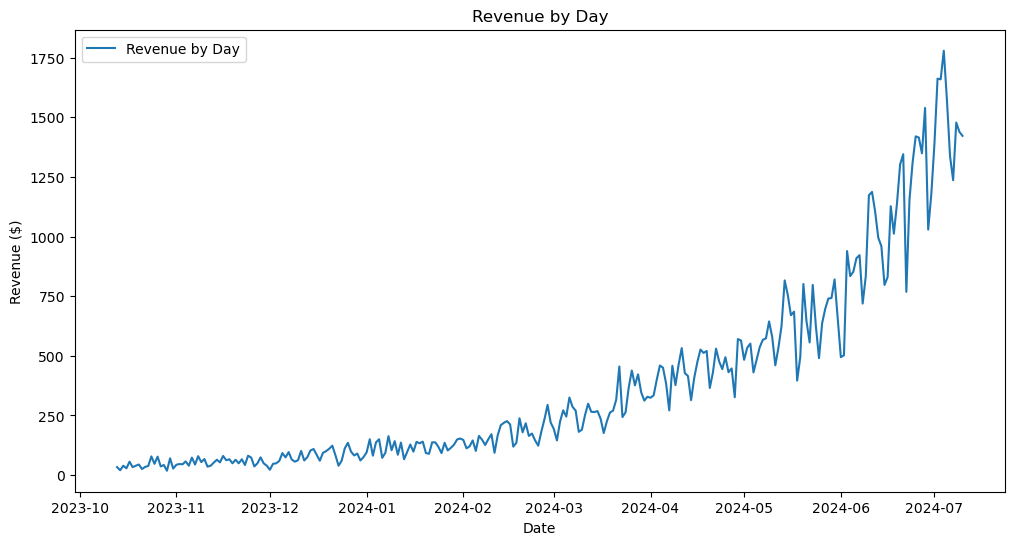

In [8]:
x = revenue_by_day.date
y = revenue_by_day.revenue

plt.figure(figsize=(12, 6)) # You can adjust the width (12) and height (6) as needed
plt.plot(x, y, label="Revenue by Day")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.title("Revenue by Day")
plt.legend()
plt.show()

In [16]:
last_day = revenue_by_day.date.max()

back_to_date_end = last_day - timedelta(days=86)
back_to_date_start = last_day - timedelta(days=176)

revenue_date_back = revenue_by_day[(revenue_by_day.date <= back_to_date_end) & (revenue_by_day.date > back_to_date_start)]
#revenue_date_back = revenue_by_day[(revenue_by_day.date <= back_to_date_end)]
revenue_date_back

,date,revenue
96,2024-01-17,139
97,2024-01-18,133
98,2024-01-19,140
99,2024-01-20,92
100,2024-01-21,89
...,...,...
181,2024-04-11,532
182,2024-04-12,427
183,2024-04-13,415
184,2024-04-14,314


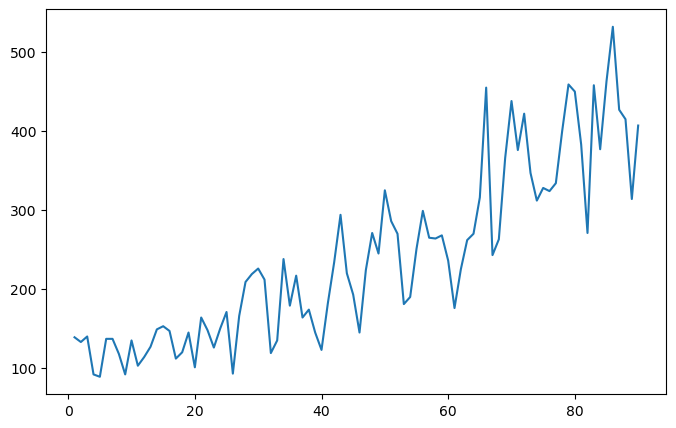

In [23]:
new_x = np.arange(1, len(revenue_date_back) +1)
y = revenue_date_back.revenue

plt.figure(figsize=(8,5))
plt.plot(new_x, y)
plt.show()

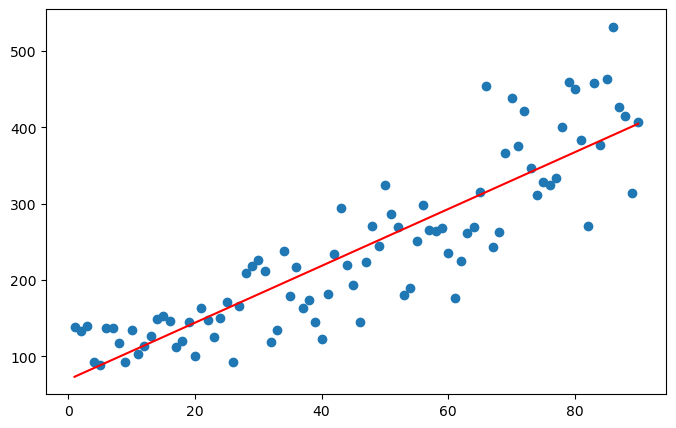

In [33]:
model = np.polyfit(new_x, y, 1)
predict_model = np.poly1d(model)

plt.figure(figsize=(8,5))
plt.scatter(new_x, y)
plt.plot(new_x, predict_model(new_x), c="r")
plt.show()

In [37]:
from sklearn.metrics import r2_score
r2_score(y, predict_model(new_x))

0.7707206795640122

In [56]:
last_day = revenue_by_day.date.max()

back_to_date_end = last_day - timedelta(days=56)
back_to_date_start = last_day - timedelta(days=86)

revenue_date_real_date = revenue_by_day[(revenue_by_day.date <= back_to_date_end) & (revenue_by_day.date > back_to_date_start)]
#revenue_date_back = revenue_by_day[(revenue_by_day.date <= back_to_date_end)]
revenue_date_real_date

,date,revenue
186,2024-04-16,473
187,2024-04-17,526
188,2024-04-18,512
189,2024-04-19,520
190,2024-04-20,365
191,2024-04-21,430
192,2024-04-22,530
193,2024-04-23,476
194,2024-04-24,444
195,2024-04-25,494


In [58]:
predict_days = np.arange(91,121)
predict_model(predict_days)

array([408.61598002, 412.34209436, 416.0682087 , 419.79432303,
       423.52043737, 427.2465517 , 430.97266604, 434.69878037,
       438.42489471, 442.15100904, 445.87712338, 449.60323771,
       453.32935205, 457.05546638, 460.78158072, 464.50769505,
       468.23380939, 471.95992372, 475.68603806, 479.41215239,
       483.13826673, 486.86438106, 490.5904954 , 494.31660973,
       498.04272407, 501.7688384 , 505.49495274, 509.22106707,
       512.94718141, 516.67329574])

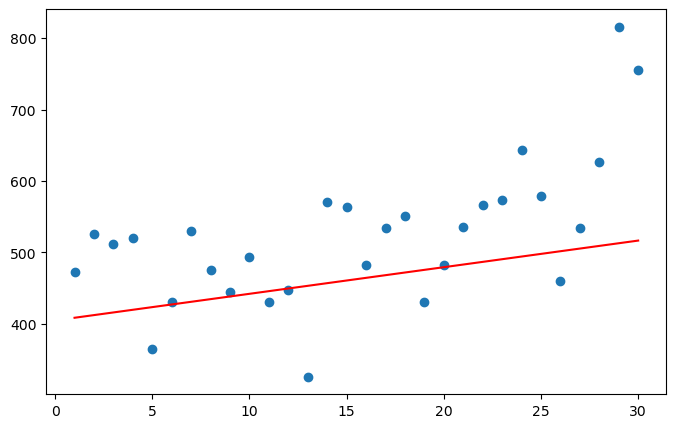

In [59]:
new_x = np.arange(1,31)
y = revenue_date_real_date.revenue

plt.figure(figsize=(8,5))
plt.scatter(new_x, y)
plt.plot(new_x, predict_model(predict_days), c="r")
plt.show()

In [137]:
last_day = revenue_by_day.date.max()

back_to_date_end = last_day - timedelta(days=40)
back_to_date_start = last_day - timedelta(days=192)

revenue_date_back = revenue_by_day[(revenue_by_day.date <= back_to_date_end) & (revenue_by_day.date > back_to_date_start)]
#revenue_date_back = revenue_by_day[(revenue_by_day.date <= back_to_date_end)]
revenue_date_back

,date,revenue
80,2024-01-01,95
81,2024-01-02,150
82,2024-01-03,81
83,2024-01-04,137
84,2024-01-05,150
...,...,...
227,2024-05-27,697
228,2024-05-28,740
229,2024-05-29,742
230,2024-05-30,820


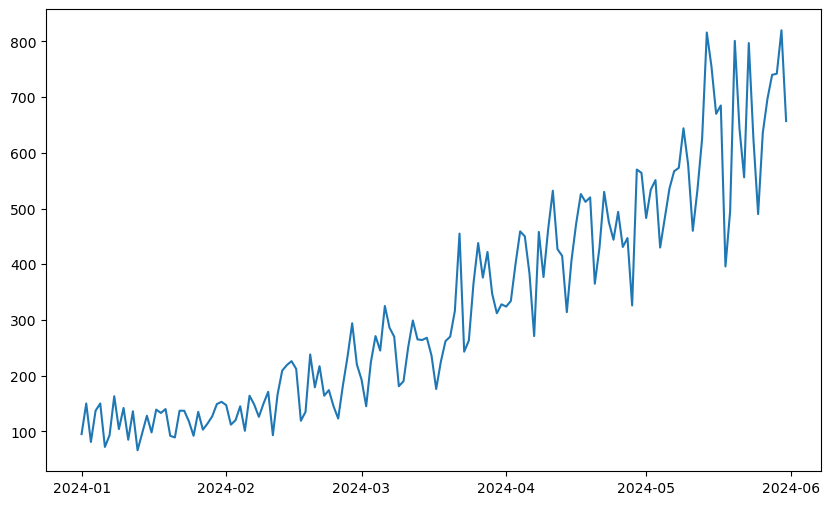

In [138]:
x = revenue_date_back.date
y = revenue_date_back.revenue

plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.show()

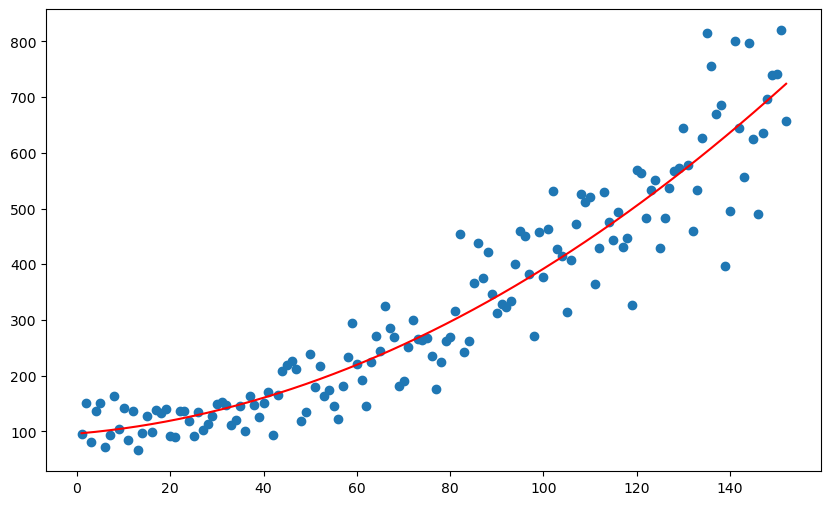

In [139]:
new_x = np.arange(1, len(x)+1)

model = np.polyfit(new_x, y, 2)
predict = np.poly1d(model)

plt.figure(figsize=(10,6))
plt.scatter(new_x, y)
plt.plot(new_x, predict(new_x), c="red")
plt.show()

In [140]:
last_day = revenue_by_day.date.max()

back_to_date_end = last_day - timedelta(days=10)
back_to_date_start = last_day - timedelta(days=40)

revenue_real = revenue_by_day[(revenue_by_day.date <= back_to_date_end) & (revenue_by_day.date > back_to_date_start)]
#revenue_date_back = revenue_by_day[(revenue_by_day.date <= back_to_date_end)]
revenue_real

,date,revenue
232,2024-06-01,494
233,2024-06-02,502
234,2024-06-03,939
235,2024-06-04,834
236,2024-06-05,852
237,2024-06-06,909
238,2024-06-07,922
239,2024-06-08,719
240,2024-06-09,834
241,2024-06-10,1173


In [141]:
predict_days = np.arange(len(new_x) + 1, len(new_x) + 31)
predict(predict_days)

array([731.57475601, 739.19851779, 746.86733328, 754.58120248,
       762.34012539, 770.14410201, 777.99313233, 785.88721637,
       793.82635411, 801.81054556, 809.83979072, 817.91408959,
       826.03344217, 834.19784846, 842.40730846, 850.66182216,
       858.96138958, 867.3060107 , 875.69568553, 884.13041407,
       892.61019632, 901.13503228, 909.70492195, 918.31986533,
       926.97986241, 935.68491321, 944.43501771, 953.23017593,
       962.07038785, 970.95565348])

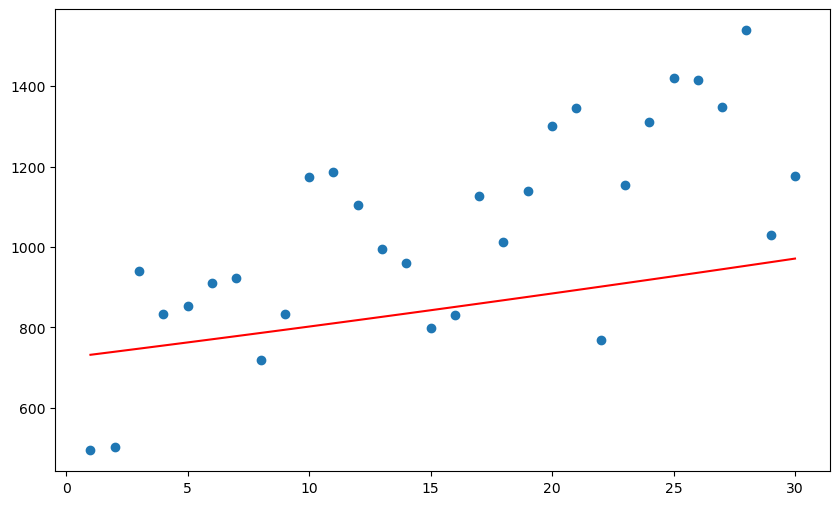

In [142]:
x2 = revenue_real.date
y2 = revenue_real.revenue
new_x2 = np.arange(1, len(x2)+1)

plt.figure(figsize=(10,6))
plt.scatter(new_x2, y2)
plt.plot(new_x2, predict(predict_days), c="r")
plt.show()

In [143]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [153]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_feature = poly.fit_transform(new_x.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_feature, y.to_numpy())
y2_predicted = poly_reg_model.predict(poly_feature)

poly_prediction = poly.transform(predict_days.reshape(-1, 1))
new_predicted_days = poly_reg_model.predict(poly_prediction)
new_predicted_days

array([731.57475601, 739.19851779, 746.86733328, 754.58120248,
       762.34012539, 770.14410201, 777.99313233, 785.88721637,
       793.82635411, 801.81054556, 809.83979072, 817.91408959,
       826.03344217, 834.19784846, 842.40730846, 850.66182216,
       858.96138958, 867.3060107 , 875.69568553, 884.13041407,
       892.61019632, 901.13503228, 909.70492195, 918.31986533,
       926.97986241, 935.68491321, 944.43501771, 953.23017593,
       962.07038785, 970.95565348])